In [1]:
import pandas as pd
path = '/home/antoni/Documents/Sample Data/Titanic - Kaggle/train.csv'
df = pd.read_csv(path)
print(df.head, df.columns)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25    

In [2]:
df = df.drop(columns=['Name', 'Ticket'])

In [3]:
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,80.0,B28,NaN


In [6]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
for i in df.index:
    if str(df.Cabin[i]) != 'nan':
        df.Cabin[i] = str(df.Cabin[i])[0]

/home/antoni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [9]:
for i in df.index:
    if str(df.Cabin[i]) == 'nan':
        df.Cabin[i] = 'X'

/home/antoni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [11]:
df = df.dropna(subset=['Embarked'])
df = df.fillna(df.mean())
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Cabin = le.fit_transform(df.Cabin)
df.Embarked = le.fit_transform(df.Embarked)
df.Sex = le.fit_transform(df.Sex)
print(df[['Cabin', 'Embarked']].head())

   Cabin  Embarked
0      8         2
1      2         0
2      8         2
3      2         2
4      8         2


In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Survived')
y = df.Survived

TX, VX, Ty, Vy = train_test_split(X, y, random_state=0)

In [14]:
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    1  22.0      1      0   7.2500      8   
1            2         1       1    0  38.0      1      0  71.2833      2   
2            3         1       3    0  26.0      0      0   7.9250      8   
3            4         1       1    0  35.0      1      0  53.1000      2   
4            5         0       3    1  35.0      0      0   8.0500      8   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(TX,Ty)
pred_dtc = dtc.predict(VX)

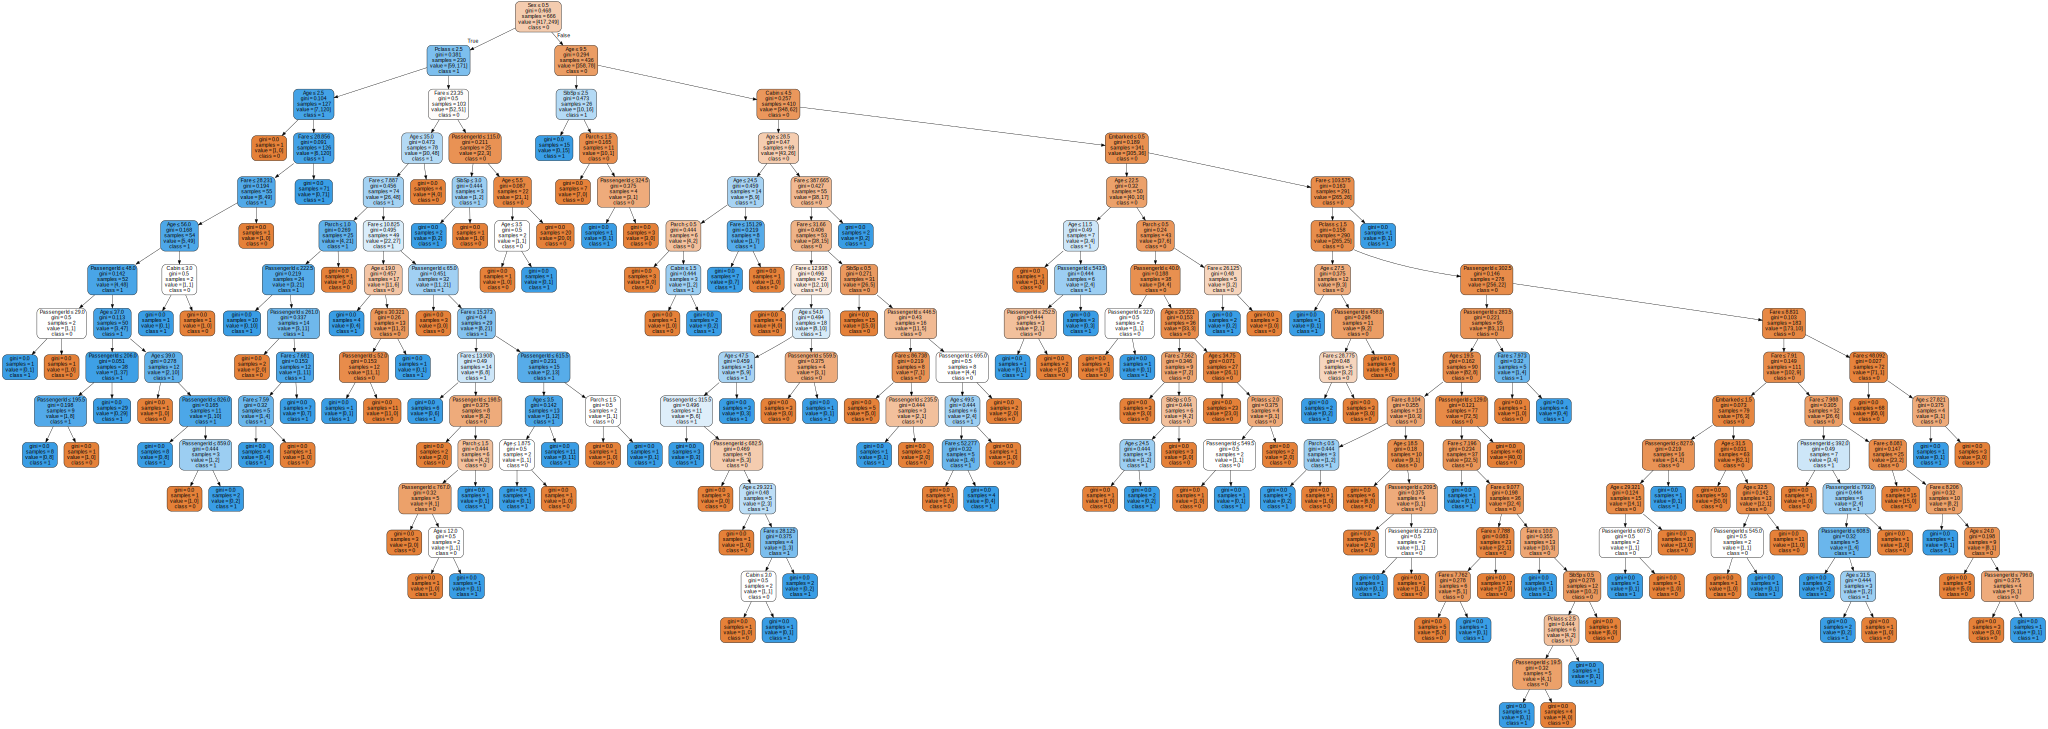

In [16]:
from sklearn.tree import export_graphviz
import graphviz
classnames = dtc.classes_

cl_names_str = []
for i in classnames:
    cl_names_str.append(str(i))
    
dot = export_graphviz(dtc, out_file=None, feature_names=X.columns, class_names = cl_names_str,
                         filled=True, rounded=True,  
                         special_characters=True,)
graphviz.Source(dot)

In [17]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Vy, pred_dtc), dtc.score(VX, Vy))

0.26905829596412556 0.7309417040358744


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(TX,Ty)
pred_knn = knn.predict(VX)
print(mean_absolute_error(Vy, pred_knn), knn.score(VX, Vy))

0.3721973094170404 0.6278026905829597


In [19]:
knn = KNeighborsClassifier(n_neighbors=20, p=1)
knn.fit(TX,Ty)
pred_knn = knn.predict(VX)
print(mean_absolute_error(Vy, pred_knn))

0.3452914798206278


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(TX, Ty)
pred_rfc = rfc.predict(VX)
print(mean_absolute_error(Vy, pred_rfc), rfc.score(VX, Vy))

0.21973094170403587 0.7802690582959642


## Confusion Matrix:
Another importan metric apart from accuracy is the confusion matrix. This tells us what kind of mistakes the classifier makes, not just how many it makes.

In [21]:
from sklearn.metrics import confusion_matrix

Columns = predicted class, 
Rows = expected class


In [64]:
pred_rfc = pd.Series(pred_rfc)


In [65]:
pred_rfc.value_counts()

0    149
1     74
dtype: int64

In [67]:
Vy.value_counts()

0    132
1     91
Name: Survived, dtype: int64

     Pred no- pred yes
Actual no  -  \[_ _ _ _ _,_ _ _ _ _\] 

Actual yes -  \[_ _ _ _ _,_ _ _ _ _\]

In [69]:
print('Random Forest: confusion_matrix')
c1 = confusion_matrix(Vy, pred_rfc)
print(c1)

Random Forest: confusion_matrix
[[116  16]
 [ 33  58]]


In [84]:
import matplotlib.pyplot as plt
def get_confusion_plot(c_m):
    tn, fp, fn, tp = c_m.ravel()
    dg = pd.DataFrame([tn, fp, fn, tp], index=['tn', 'fp', 'fn', 'tp'])
    plt.pie(dg, labels=dg.index, autopct='%1.0f%%')

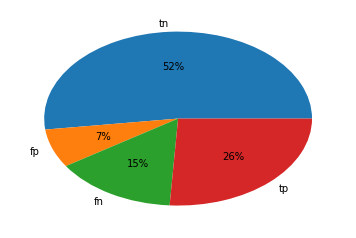

In [85]:
get_confusion_plot(c1)

In [86]:
print('Knearest: confusion_matrix')
c2 = confusion_matrix(Vy, pred_knn)
print(c2)

Knearest: confusion_matrix
[[127   5]
 [ 72  19]]


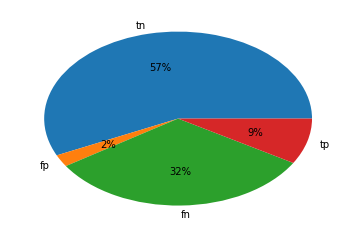

In [87]:
get_confusion_plot(c2)

In [88]:
print('Tree: confusion_matrix')
c3 = confusion_matrix(Vy, pred_dtc)
print(c3)

Tree: confusion_matrix
[[105  27]
 [ 33  58]]


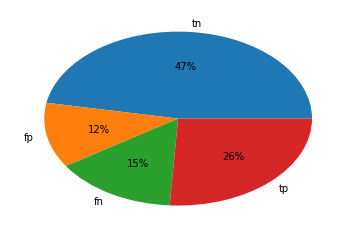

In [89]:
get_confusion_plot(c3)

## Precision v recall:
For our purposes we will be calculating precision and recall manually.

In [94]:
def get_precision_recall(c_m):
    tn, fp, fn, tp = c_m.ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    return 'Recall = ' + str(recall) + ' Precision = '+str(precision)


In [95]:
# Precision and Recall for random forrest
get_precision_recall(c1)

'Recall = 0.6373626373626373 Precision = 0.7837837837837838'

In [96]:
# Precision and Recall for knn
get_precision_recall(c2)

'Recall = 0.2087912087912088 Precision = 0.7916666666666666'

In [97]:
# Precision and Recall for tree
get_precision_recall(c3)

'Recall = 0.6373626373626373 Precision = 0.6823529411764706'

#### Observations:
For knn the recall was forseeable from the graph: a very low proportion of false positives. Also we observe high precision: meaning the algorithm generally 'overlabelling' negatives.
For the random forest the greater precision was also visible from our graph: less false positives. 
The forest is undeniable and improvement upon the algorithms, it has an improvement in precision without a recall cost.

## K-fold cross validation:
We will now be using K-fold cross validation to estimate the accuracy of our classifiers. For this however we will require the original data rather than the split data. Since we used the default paramaters we can simply create new models.

In [100]:
knn1 = KNeighborsClassifier()
rfc1 = RandomForestClassifier()
dtc1 = DecisionTreeClassifier()

In [105]:
from sklearn.model_selection import cross_val_score
score_forest = cross_val_score(rfc1, X, y,)
score_knn = cross_val_score(knn1, X, y)
score_tree = cross_val_score(dtc1, X, y)

Default k is 3. k is the cv parameter.

In [106]:
print(score_forest,
score_knn ,
score_tree)

[0.76430976 0.79054054 0.82094595] [0.64983165 0.40540541 0.64189189] [0.60942761 0.59121622 0.80405405]


In [108]:
import numpy as np

In [109]:
print(np.mean(score_forest),
np.mean(score_knn) ,
np.mean(score_tree))

0.7919320835987502 0.5657096490429824 0.6682326265659598


In [110]:
score_forest = cross_val_score(rfc1, X, y, cv=10)
score_knn = cross_val_score(knn1, X, y, cv=10)
score_tree = cross_val_score(dtc1, X, y, cv=10)

In [111]:
print(score_forest,
score_knn ,
score_tree)

[0.75280899 0.79775281 0.76404494 0.79775281 0.91011236 0.82022472
 0.84269663 0.79775281 0.83146067 0.85227273] [0.4494382  0.62921348 0.42696629 0.4494382  0.4494382  0.48314607
 0.46067416 0.47191011 0.53932584 0.65909091] [0.71910112 0.7752809  0.71910112 0.66292135 0.65168539 0.78651685
 0.79775281 0.80898876 0.80898876 0.81818182]


In [112]:
print(np.mean(score_forest),
np.mean(score_knn) ,
np.mean(score_tree))

0.816687946884576 0.5018641470888662 0.7548518896833504


In [113]:
score_forest = cross_val_score(rfc1, X, y, cv=100)
score_knn = cross_val_score(knn1, X, y, cv=100)
score_tree = cross_val_score(dtc1, X, y, cv=100)
print(np.mean(score_forest),
np.mean(score_knn) ,
np.mean(score_tree))

0.7952777777777778 0.5834999999999999 0.7544444444444445
